## Semillero de Programación en Ciencias Sociales (Sesión 5- 2020-2)
### Felipe Botero, Juan Carlos Rodirguez, Laura Merchán y Wilson Forero

In [ ]:
#!pip install altair vega_datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import math

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
senado=pd.read_excel("./SENADO2018_F.xls")

### Problema 3: 
Según la Registraduría los votos validos de una elección se miden de esta forma
```python
VOTOS_VALIDOS = VOTOS_POR_LISTAS + VOTOS_EN_BLANCO
```
Donde `VOTOS_POR_LIST`= Suma de votos por cada Partido/Movimiento y cada uno de sus candidatos (Es decir la observaciones 0-899)

Y donde `VOTOS_EN_BLANCO` (observación 900). 

Calcule los `VOTOS_VALIDOS`, para ello va a necesitar idexar la base de datos y aplicar el método .sum()

In [6]:
VOTOS_VALIDOS=senado[0:901].votos.sum()
VOTOS_VALIDOS

15609396

### Problema 4: 
Según la Registraduría el Cociente Electoral de una elección se miden de esta forma
```python
COCIENTE_ELECTORAL = VOTOS_POR_LISTAS / NÚMERO DE CURULES A ASIGNAR
```
Suponga que el número de curules a asignar es 100. 

¿Cuál es el valor del Cociente Electoral?

In [7]:
COCIENTE_ELECTORAL=VOTOS_VALIDOS/100
COCIENTE_ELECTORAL

156093.96

## Distribución de curules en el Senado 2018: ¿Cuántas curules le corresponden a cada partido?

### Para ver el paso a paso procedimental: [acá](https://www.registraduria.gov.co/Elecciones/refor_elect.htm)

**ACLARACIÓN**

Según el Consejo Nacional Electoral en la Resolución 1596, determinaron que en virtud del Artículo Transitorio 2 del Acto Legislativo 3 de 2017, los votos de las FARC no hacen parte de los Votos Validos. 

Aclararon También que `342080`votos en blanco corresponden a la Circuscripción Indigena en la base de la Registraduría estan Agrupados. 

Por lo tanto tenemos que arreglar la base

In [8]:
senado

,ano,tipo_eleccion,codep,codmpio,mpio,codpartido,codlista,primer_apellido,segundo_apellido,nombre,genero,votos,curules,CE_INDIGENAS
0,2018,2,nan,99,TOTAL NACIONAL,PARTIDO LIBERAL,0.00,NaN,NaN,PARTIDO LIBERAL COLOMBIANO,nan,188569,nan,nan
1,2018,2,nan,99,TOTAL NACIONAL,PARTIDO LIBERAL,1.00,GOMEZ,AMIN,MAURICIO,nan,107544,1.00,nan
2,2018,2,nan,99,TOTAL NACIONAL,PARTIDO LIBERAL,2.00,AMIN,SALEME,FABIO RAUL,nan,87827,1.00,nan
3,2018,2,nan,99,TOTAL NACIONAL,PARTIDO LIBERAL,3.00,PINTO,HERNANDEZ,MIGUEL ANGEL,nan,84984,1.00,nan
4,2018,2,nan,99,TOTAL NACIONAL,PARTIDO LIBERAL,4.00,VELASQUEZ,NIETO,OLGA LUCIA,nan,56208,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2018,2,nan,99,TOTAL NACIONAL,G.S.C. COLOMBIA JUSTA LIBRES,0.00,NaN,NaN,G.S.C. COLOMBIA JUSTA LIBRES,nan,463521,nan,nan
900,2018,2,nan,99,TOTAL NACIONAL,NaN,996.00,NaN,NaN,VOTOS EN BLANCO,nan,1183292,nan,nan
901,2018,2,nan,99,TOTAL NACIONAL,NaN,997.00,NaN,NaN,VOTOS NULOS,nan,1151181,nan,nan
902,2018,2,nan,99,TOTAL NACIONAL,NaN,998.00,NaN,NaN,VOTOS NO MARCADOS,nan,870007,nan,nan


In [9]:
senado=senado.loc[senado["codpartido"]!="FARC"]
senado=senado.reset_index()

In [10]:
VOTOS_VALIDOS=senado[0:877].votos.sum()
VOTOS_VALIDOS=VOTOS_VALIDOS-342080
VOTOS_VALIDOS

15211916

## Umbral

En el cálculo del umbral, se contabilizan los votos válidos, como lo sostuvo el artículo 14 del Reglamento 01 de 2003, expedido por el Consejo Nacional Electoral para las elecciones del 26 de octubre de 2003, al expresar que el UMBRAL corresponde a la cantidad mínima de votos válidos que debe obtener una lista para que le sea aplicada la cifra repartidora. Se emplea para listas a corporaciones.

```python

UMBRAL = VOTOS_VALIDOS*(0.03)

```

In [11]:
UMBRAL=VOTOS_VALIDOS*(0.03)
UMBRAL

456357.48

**¿ Qué porcentaje de partidos lograron pasar el umbral?**

In [12]:
Senado2=senado.groupby("codpartido")[["votos"]].sum()

In [13]:
Senado2=Senado2.reset_index()

In [14]:
Senado2["umbral"]=np.where(Senado2['votos']>=UMBRAL, 'Pasó', 'No_Pasó')
Senado2

,codpartido,votos,umbral
0,ALIANZA VERDE,1308208,Pasó
1,CAMBIO RADICAL,2142040,Pasó
2,CENTRO DEMOCRÁTICO,2501995,Pasó
3,"COALICIÓN LISTA DE LA DECENCIA (ASI,UP,MAIS)",519262,Pasó
4,G.S.C. COLOMBIA JUSTA LIBRES,463521,Pasó
5,G.S.C. SI SE PUEDE,13196,No_Pasó
6,G.S.C. UNIÓN CON FORTALEZA,34275,No_Pasó
7,MIRA,495506,Pasó
8,"MOVIMIENTO TODOS SOMOS COLOMBIA ""TSC""",57465,No_Pasó
9,OPCIÓN CIUDADANA,346398,No_Pasó


## Paquete Matplotlib

La libreria Matplotlib es probablemente la libreria más usada para la visulización en Python. 
Toda la documentación la podemos encontrar [acá](https://matplotlib.org). Si bien es la librería más común y hay mucha domunentación al respecto, suele ser complicada la visualización

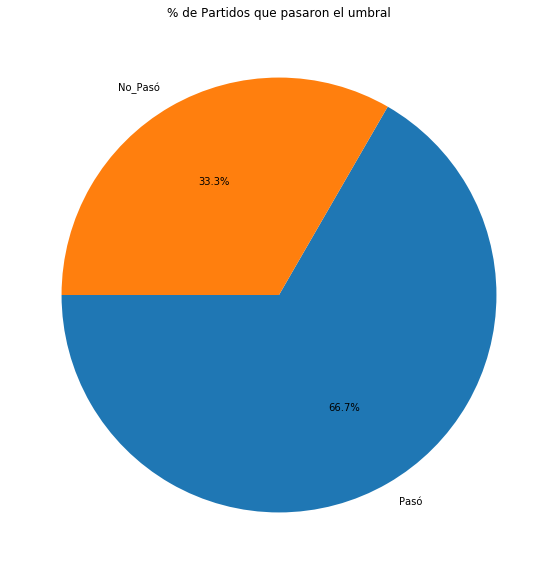

In [17]:
plt.figure(figsize=(10,10))
plt.pie(Senado2['umbral'].value_counts(), labels= Senado2['umbral'].value_counts().index.tolist(), startangle = 180, autopct='%1.1f%%', radius=1)
plt.title('% de Partidos que pasaron el umbral')
plt.show()

#Senado2.umbral.value_counts().sort_values(ascending=False).plot(kind = 'bar')

**¿Qué Partidos Pasaron?**

In [18]:
pasaron_umbral=Senado2.loc[Senado2['umbral'] == "Pasó"].sort_values("votos",ascending=False)
pasaron_umbral = pasaron_umbral.reset_index(drop=True)
pasaron_umbral

,codpartido,votos,umbral
0,CENTRO DEMOCRÁTICO,2501995,Pasó
1,CAMBIO RADICAL,2142040,Pasó
2,PARTIDO CONSERVADOR,1931140,Pasó
3,PARTIDO LIBERAL,1886895,Pasó
4,PARTIDO DE LA U,1844847,Pasó
5,ALIANZA VERDE,1308208,Pasó
6,POLO DEMOCRATICO,722987,Pasó
7,"COALICIÓN LISTA DE LA DECENCIA (ASI,UP,MAIS)",519262,Pasó
8,MIRA,495506,Pasó
9,G.S.C. COLOMBIA JUSTA LIBRES,463521,Pasó


## Paquete Altair

Altair es una libreria para hacer visualizaciones en Python. Ha cogido fuerza por la facilidad de hacer gráficas de una forma más intuitiva (veremos más aplicaciones en las próximas sesiones). La documentación la pueden encontrar [acá](https://altair-viz.github.io)

In [29]:
alt.Chart(pasaron_umbral, title="Votaciones agregadas por partido (2018)").mark_bar().encode(
    x=alt.X('codpartido', sort=None),
    y='votos',
).properties(
    width=500,
    height=400
)

alt.Chart(...)

## Cifra Repartidora

Recordemos, que la adjudicación de curules entre los miembros de la respectiva lista se hará por el sistema de cifra repartidora. Esta resulta de dividir sucesivamente por uno, dos, tres... hasta el número de curules a proveer, el número de votos válidos obtenidos por cada lista, ordenando los resultados en forma decreciente hasta que se obtenga un número total de resultados igual al numero de escaños por asignar. Visto lo anterior, se debe proceder:

1. Se ordenan las listas que superaron el UMBRAL, de mayor a menor votación.

2. Se divide cada una de las votaciones por uno, por dos, por tres, y así sucesivamente hasta un número igual al de curules a proveer (cantidad de ediles, de concejales o de diputados, según la circunscripción). De este ejercicio se obtiene una matriz de resultados

3. Se toman los mayores resultados, tantos como curules a proveer y se ordenan de mayor a menor. El último de esos resultados es la CIFRA REPARTIDORA.



In [38]:
pasaron_umbral=pasaron_umbral.drop("umbral", axis=1)

In [39]:
copia_umbral=pasaron_umbral

In [40]:
for i in range (2,101):
    copia_umbral["Candidato{0}".format(i)]=copia_umbral["votos"]/(i)

In [41]:
copia_umbral

,codpartido,votos,Candidato2,Candidato3,Candidato4,Candidato5,Candidato6,Candidato7,Candidato8,Candidato9,...,Candidato91,Candidato92,Candidato93,Candidato94,Candidato95,Candidato96,Candidato97,Candidato98,Candidato99,Candidato100
0,CENTRO DEMOCRÁTICO,2501995,1250997.50,833998.33,625498.75,500399.00,416999.17,357427.86,312749.38,277999.44,...,27494.45,27195.60,26903.17,26616.97,26336.79,26062.45,25793.76,25530.56,25272.68,25019.95
1,CAMBIO RADICAL,2142040,1071020.00,714013.33,535510.00,428408.00,357006.67,306005.71,267755.00,238004.44,...,23538.90,23283.04,23032.69,22787.66,22547.79,22312.92,22082.89,21857.55,21636.77,21420.40
2,PARTIDO CONSERVADOR,1931140,965570.00,643713.33,482785.00,386228.00,321856.67,275877.14,241392.50,214571.11,...,21221.32,20990.65,20764.95,20544.04,20327.79,20116.04,19908.66,19705.51,19506.46,19311.40
3,PARTIDO LIBERAL,1886895,943447.50,628965.00,471723.75,377379.00,314482.50,269556.43,235861.88,209655.00,...,20735.11,20509.73,20289.19,20073.35,19862.05,19655.16,19452.53,19254.03,19059.55,18868.95
4,PARTIDO DE LA U,1844847,922423.50,614949.00,461211.75,368969.40,307474.50,263549.57,230605.88,204983.00,...,20273.04,20052.68,19837.06,19626.03,19419.44,19217.16,19019.04,18824.97,18634.82,18448.47
5,ALIANZA VERDE,1308208,654104.00,436069.33,327052.00,261641.60,218034.67,186886.86,163526.00,145356.44,...,14375.91,14219.65,14066.75,13917.11,13770.61,13627.17,13486.68,13349.06,13214.22,13082.08
6,POLO DEMOCRATICO,722987,361493.50,240995.67,180746.75,144597.40,120497.83,103283.86,90373.38,80331.89,...,7944.91,7858.55,7774.05,7691.35,7610.39,7531.11,7453.47,7377.42,7302.90,7229.87
7,"COALICIÓN LISTA DE LA DECENCIA (ASI,UP,MAIS)",519262,259631.00,173087.33,129815.50,103852.40,86543.67,74180.29,64907.75,57695.78,...,5706.18,5644.15,5583.46,5524.06,5465.92,5408.98,5353.22,5298.59,5245.07,5192.62
8,MIRA,495506,247753.00,165168.67,123876.50,99101.20,82584.33,70786.57,61938.25,55056.22,...,5445.12,5385.93,5328.02,5271.34,5215.85,5161.52,5108.31,5056.18,5005.11,4955.06
9,G.S.C. COLOMBIA JUSTA LIBRES,463521,231760.50,154507.00,115880.25,92704.20,77253.50,66217.29,57940.12,51502.33,...,5093.64,5038.27,4984.10,4931.07,4879.17,4828.34,4778.57,4729.81,4682.03,4635.21


In [42]:
copia_umbral=copia_umbral.set_index('codpartido')

In [43]:
copia_umbral.stack()

codpartido                                
CENTRO DEMOCRÁTICO            votos          2501995.00
                              Candidato2     1250997.50
                              Candidato3      833998.33
                              Candidato4      625498.75
                              Candidato5      500399.00
                                                ...    
G.S.C. COLOMBIA JUSTA LIBRES  Candidato96       4828.34
                              Candidato97       4778.57
                              Candidato98       4729.81
                              Candidato99       4682.03
                              Candidato100      4635.21
Length: 1000, dtype: float64

In [44]:
copia_umbral.stack().nlargest(100, keep="last")

codpartido                      
CENTRO DEMOCRÁTICO   votos         2501995.00
CAMBIO RADICAL       votos         2142040.00
PARTIDO CONSERVADOR  votos         1931140.00
PARTIDO LIBERAL      votos         1886895.00
PARTIDO DE LA U      votos         1844847.00
                                      ...    
PARTIDO CONSERVADOR  Candidato14    137938.57
PARTIDO LIBERAL      Candidato14    134778.21
CAMBIO RADICAL       Candidato16    133877.50
PARTIDO DE LA U      Candidato14    131774.79
CENTRO DEMOCRÁTICO   Candidato19    131683.95
Length: 100, dtype: float64

***Este último número `131683.95`es la cifra repartidora***

## Asignación de Curules

Se divide cada una de las votaciones de las `listas que superaron el UMBRAL` por la cifra repartidora y el valor entero de cada uno de los resultados es el número de curules que obtiene cada lista.

```python

CURULES = VOTACIÓN_LISTA/CIFRA_REPARTIDORA

```

In [47]:
pasaron_umbral["curules"]=round((pasaron_umbral["votos"]/131683.959)-0.49)

In [48]:
pasaron_umbral

,codpartido,votos,Candidato2,Candidato3,Candidato4,Candidato5,Candidato6,Candidato7,Candidato8,Candidato9,...,Candidato92,Candidato93,Candidato94,Candidato95,Candidato96,Candidato97,Candidato98,Candidato99,Candidato100,curules
0,CENTRO DEMOCRÁTICO,2501995,1250997.50,833998.33,625498.75,500399.00,416999.17,357427.86,312749.38,277999.44,...,27195.60,26903.17,26616.97,26336.79,26062.45,25793.76,25530.56,25272.68,25019.95,19.00
1,CAMBIO RADICAL,2142040,1071020.00,714013.33,535510.00,428408.00,357006.67,306005.71,267755.00,238004.44,...,23283.04,23032.69,22787.66,22547.79,22312.92,22082.89,21857.55,21636.77,21420.40,16.00
2,PARTIDO CONSERVADOR,1931140,965570.00,643713.33,482785.00,386228.00,321856.67,275877.14,241392.50,214571.11,...,20990.65,20764.95,20544.04,20327.79,20116.04,19908.66,19705.51,19506.46,19311.40,14.00
3,PARTIDO LIBERAL,1886895,943447.50,628965.00,471723.75,377379.00,314482.50,269556.43,235861.88,209655.00,...,20509.73,20289.19,20073.35,19862.05,19655.16,19452.53,19254.03,19059.55,18868.95,14.00
4,PARTIDO DE LA U,1844847,922423.50,614949.00,461211.75,368969.40,307474.50,263549.57,230605.88,204983.00,...,20052.68,19837.06,19626.03,19419.44,19217.16,19019.04,18824.97,18634.82,18448.47,14.00
5,ALIANZA VERDE,1308208,654104.00,436069.33,327052.00,261641.60,218034.67,186886.86,163526.00,145356.44,...,14219.65,14066.75,13917.11,13770.61,13627.17,13486.68,13349.06,13214.22,13082.08,9.00
6,POLO DEMOCRATICO,722987,361493.50,240995.67,180746.75,144597.40,120497.83,103283.86,90373.38,80331.89,...,7858.55,7774.05,7691.35,7610.39,7531.11,7453.47,7377.42,7302.90,7229.87,5.00
7,"COALICIÓN LISTA DE LA DECENCIA (ASI,UP,MAIS)",519262,259631.00,173087.33,129815.50,103852.40,86543.67,74180.29,64907.75,57695.78,...,5644.15,5583.46,5524.06,5465.92,5408.98,5353.22,5298.59,5245.07,5192.62,3.00
8,MIRA,495506,247753.00,165168.67,123876.50,99101.20,82584.33,70786.57,61938.25,55056.22,...,5385.93,5328.02,5271.34,5215.85,5161.52,5108.31,5056.18,5005.11,4955.06,3.00
9,G.S.C. COLOMBIA JUSTA LIBRES,463521,231760.50,154507.00,115880.25,92704.20,77253.50,66217.29,57940.12,51502.33,...,5038.27,4984.10,4931.07,4879.17,4828.34,4778.57,4729.81,4682.03,4635.21,3.00


Pueden corroborar los resultados aquí: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&ved=2ahUKEwiQ_K6yh-nnAhVCh-AKHT1PCEcQFjABegQIBRAB&url=https%3A%2F%2Fwww.cne.gov.co%2Fcomponent%2Fphocadownload%2Fcategory%2F10-resoluciones-cne%3Fdownload%3D486%3Aresolucion-n-1596-19-julio-2018-respuesta-a-declara-eleccion-del-senado-de-la-republica-periodo%26start%3D130&usg=AOvVaw18ylIgKghwuuoXeF73w50n

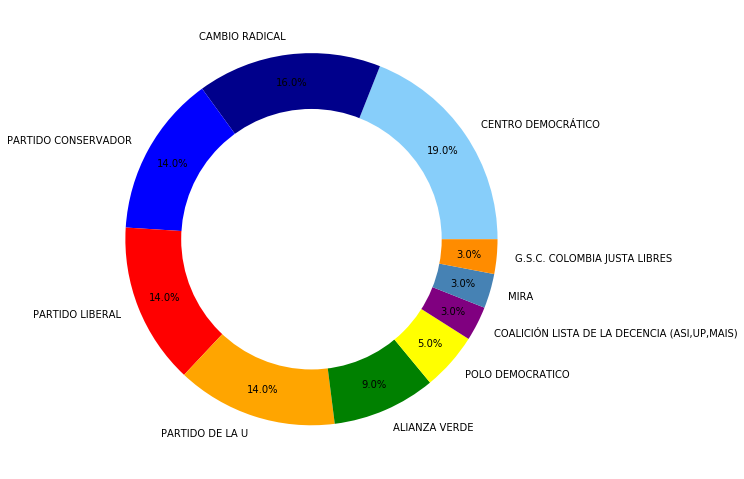

In [49]:
plt.figure(figsize=(10,10))
labels = pasaron_umbral['codpartido']
sizes = pasaron_umbral['curules']
colors = ['lightskyblue','darkblue','blue','red','orange',"green","yellow", 'purple', 'steelblue','darkorange']
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=360, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

## Para ir pensando en su "Trabajo Final":

1. Encontrar los candidatos que resultaron elegidos
2. Aplicar esta metodología a otra elección en Colombia y comparar las diferencias
3. Aplicar esta metodología a otro país
4. Aplicar esta metodología para la cámara o algún consejo
5. Mirar esta eleccion desde un departamento, como se distribuirían las curules si solo miramos Bogotá, Antioquia??